# Consommation Energie RNN

In [108]:
#Import 
#import librairies 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# na_values=['nan','?']

In [109]:
#Récuperation du dataframe 
df_raw = pd.read_csv("C:/Users/User/Desktop/Conso_Energie/household_power_consumption.txt", sep=';', parse_dates={'dt' : ['Date', 'Time']}, infer_datetime_format=True, 
                 low_memory=False, index_col='dt')
df_raw

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
dt,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
2006-12-16 17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2006-12-16 17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
2006-12-16 17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
2006-12-16 17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0
...,...,...,...,...,...,...,...
2010-11-26 20:58:00,0.946,0.000,240.430,4.000,0.000,0.000,0.0
2010-11-26 20:59:00,0.944,0.000,240.000,4.000,0.000,0.000,0.0
2010-11-26 21:00:00,0.938,0.000,239.820,3.800,0.000,0.000,0.0


In [110]:
df = df_raw.copy()

In [4]:
df.shape

(2075259, 7)

In [111]:
df.isnull().sum()

Global_active_power          0
Global_reactive_power        0
Voltage                      0
Global_intensity             0
Sub_metering_1               0
Sub_metering_2               0
Sub_metering_3           25979
dtype: int64

In [112]:
# replace NaN by median on Sub_metering_3
df.Sub_metering_3.fillna(df.Sub_metering_3.mean(), inplace=True)

In [113]:
df.isnull().sum()

Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
dtype: int64

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2075259 entries, 2006-12-16 17:24:00 to 2010-11-26 21:02:00
Data columns (total 7 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Global_active_power    object 
 1   Global_reactive_power  object 
 2   Voltage                object 
 3   Global_intensity       object 
 4   Sub_metering_1         object 
 5   Sub_metering_2         object 
 6   Sub_metering_3         float64
dtypes: float64(1), object(6)
memory usage: 126.7+ MB


In [114]:
df["Global_active_power"] = pd.to_numeric(df.Global_active_power , errors='coerce')

In [115]:
df["Global_reactive_power"] = pd.to_numeric(df.Global_reactive_power , errors='coerce')

In [116]:
df["Voltage"] = pd.to_numeric(df.Voltage , errors='coerce')

In [117]:
df["Global_intensity"] = pd.to_numeric(df.Global_intensity , errors='coerce')

In [118]:
df["Sub_metering_1"] = pd.to_numeric(df.Sub_metering_1 , errors='coerce')

In [119]:
df["Sub_metering_2"] = pd.to_numeric(df.Sub_metering_2 , errors='coerce')

In [121]:
df["Sub_metering_3"] = pd.to_numeric(df.Sub_metering_3 , errors='coerce')

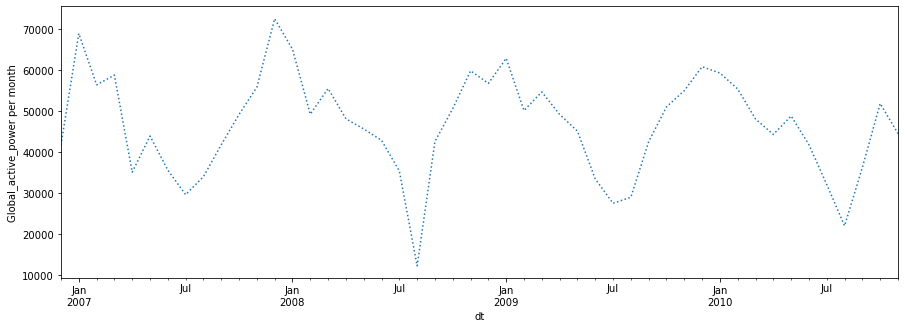

In [23]:
# plot item_price par mois
f, ax1 = plt.subplots(1,1,figsize=(15,5))
monthly = df['Global_active_power'].resample('M').sum()
monthly.plot(style=[':', '--', '-'])
plt.ylabel('Global_active_power per month');

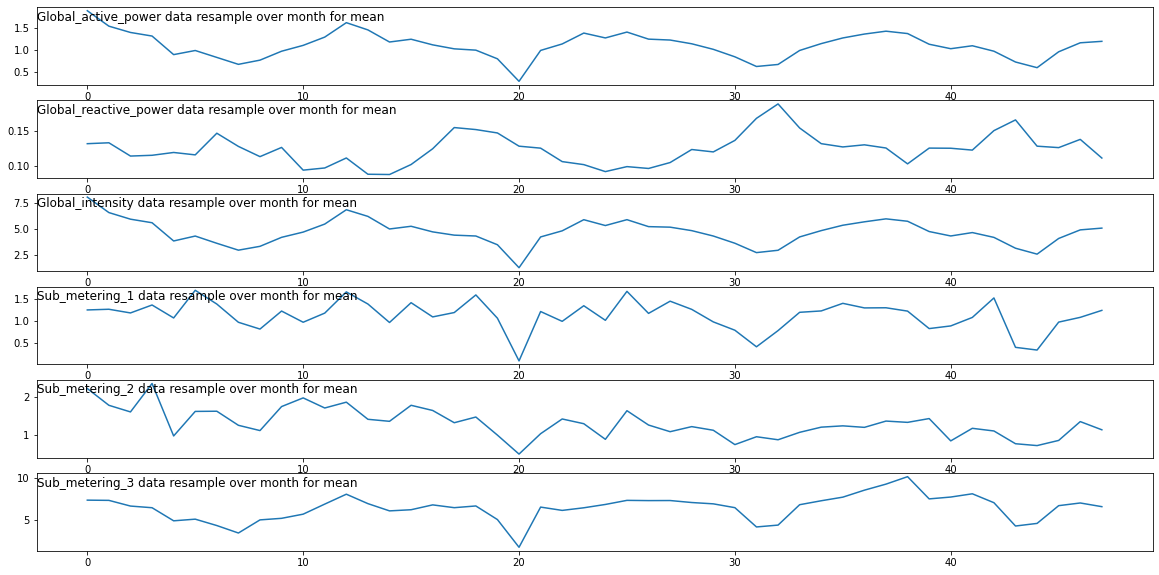

In [33]:
i = 1
cols=[0, 1, 3, 4, 5, 6]
plt.figure(figsize=(20, 10))
for col in cols:
    plt.subplot(len(cols), 1, i)
    plt.plot(df.resample('M').mean().values[:, col])
    plt.title(df.columns[col] + ' data resample over month for mean', y=0.75, loc='left')
    i += 1
plt.show()

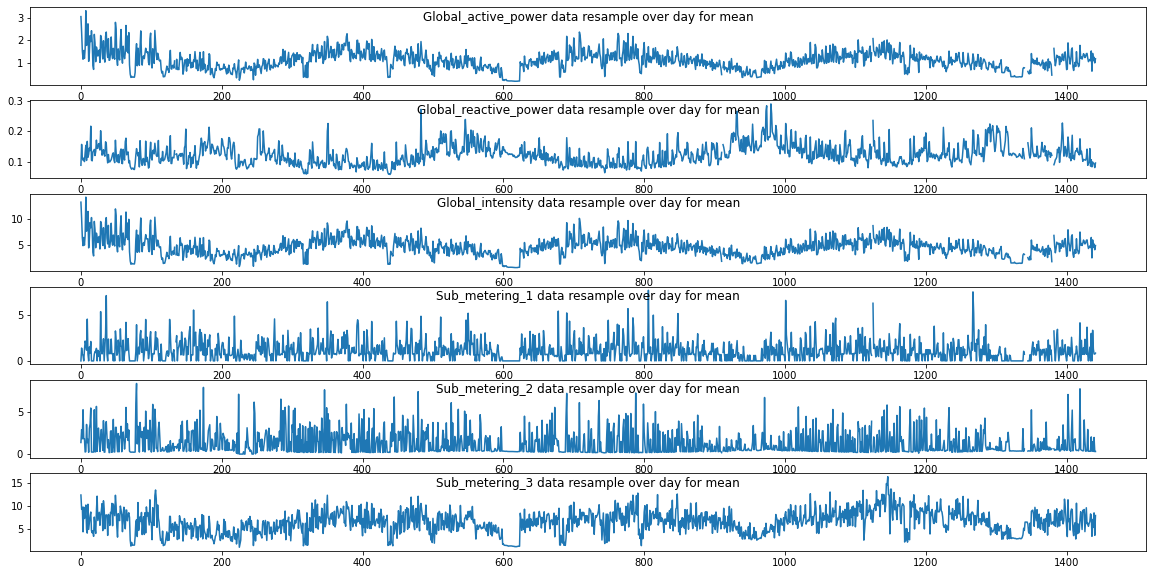

In [34]:
i = 1
cols=[0, 1, 3, 4, 5, 6]
plt.figure(figsize=(20, 10))
for col in cols:
    plt.subplot(len(cols), 1, i)
    plt.plot(df.resample('D').mean().values[:, col])
    plt.title(df.columns[col] + ' data resample over day for mean', y=0.75, loc='center')
    i += 1
plt.show()

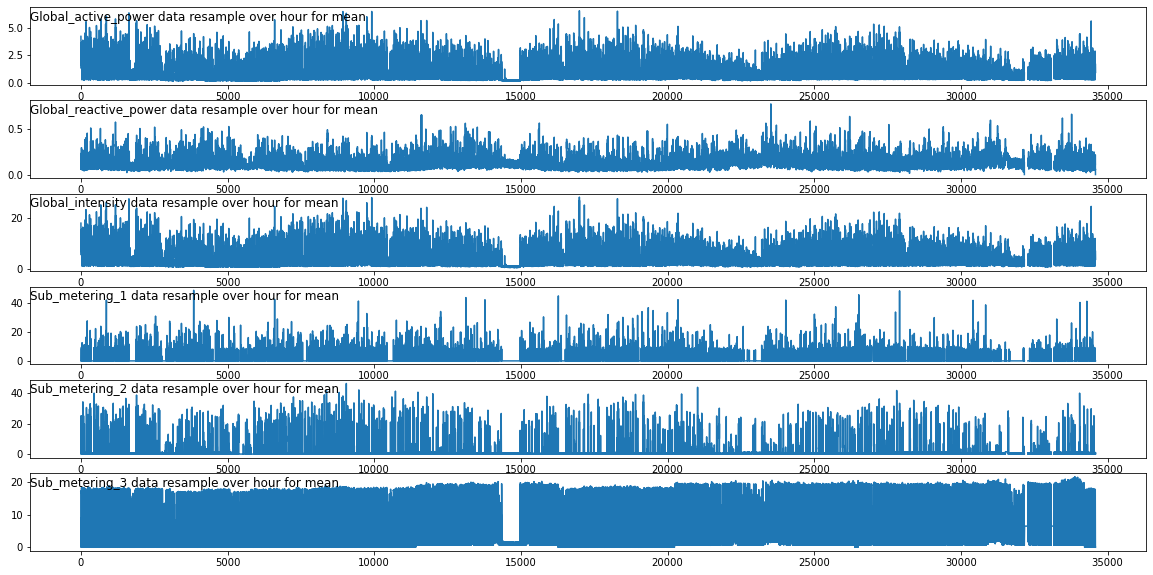

In [35]:
i = 1
cols=[0, 1, 3, 4, 5, 6]
plt.figure(figsize=(20, 10))
for col in cols:
    plt.subplot(len(cols), 1, i)
    plt.plot(df.resample('H').mean().values[:, col])
    plt.title(df.columns[col] + ' data resample over hour for mean', y=0.75, loc='left')
    i += 1
plt.show()

In [ ]:
# From above visualizations:
# the resampling by month, date or hour is very important because it has a large interaction as expected (changing the periodicity of the system).
# Therefore, if processing all the original data, the runtime will be very costly, but if processing data with large time-scale samples (e.g. monthly), it will affect the model's predictivity.
# From observation, we can see, it is relatively reasonable to resample data by hour.

In [122]:
df.corr()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
Global_active_power,1.000000,0.247017,-0.399762,0.998889,0.484401,0.434569,0.638555
Global_reactive_power,0.247017,1.000000,-0.112246,0.266120,0.123111,0.139231,0.089617
Voltage,-0.399762,-0.112246,1.000000,-0.411363,-0.195976,-0.167405,-0.268172
Global_intensity,0.998889,0.266120,-0.411363,1.000000,0.489298,0.440347,0.626543
Sub_metering_1,0.484401,0.123111,-0.195976,0.489298,1.000000,0.054721,0.102571
Sub_metering_2,0.434569,0.139231,-0.167405,0.440347,0.054721,1.000000,0.080872
Sub_metering_3,0.638555,0.089617,-0.268172,0.626543,0.102571,0.080872,1.000000


In [ ]:
# From above table, it is seen that 'Global_intensity' and 'Global_active_power' correlated. 
# But 'Voltage', 'Global_active_power' are less correlated.

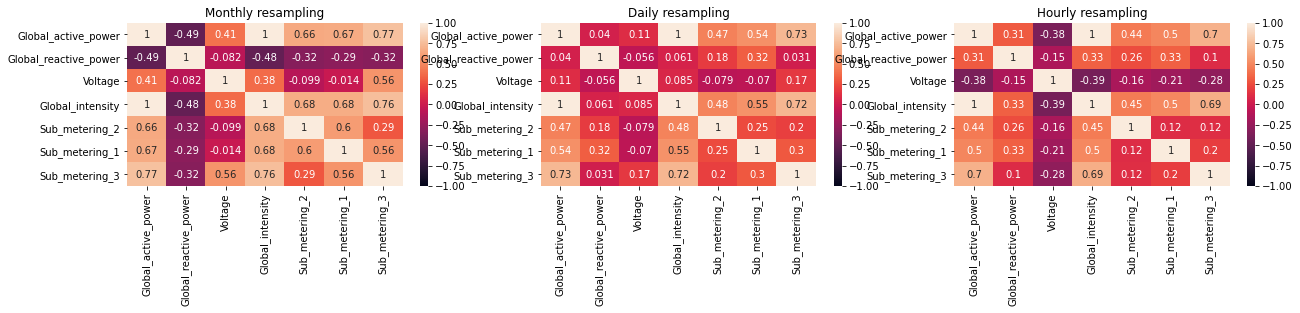

In [76]:
f= plt.figure(figsize=(21,3))

ax=f.add_subplot(131)
dfm = df.resample('M').mean()
sns.heatmap(dfm.corr(), vmin=-1, vmax=1, annot=True)
plt.title('Monthly resampling', size=12)

ax=f.add_subplot(132)
dfd = df.resample('D').mean()
sns.heatmap(dfd.corr(), vmin=-1, vmax=1, annot=True)
plt.title('Daily resampling', size=12)
  
ax=f.add_subplot(133)
dfh = df.resample('H').mean()
sns.heatmap(dfh.corr(), vmin=-1, vmax=1, annot=True)
plt.title('Hourly resampling', size=12)
plt.show()


In [136]:
df_raw.shape

(2075259, 7)

In [137]:
df = df[['Global_active_power', 'Global_reactive_power', 'Voltage',
       'Global_intensity', 'Sub_metering_2', 'Sub_metering_1','Sub_metering_3']]

In [138]:
df.shape[1]

7

In [139]:
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    n_vars = 1 if type(data) is list else data.shape[1]
    dff = pd.DataFrame(data)
    cols, names = list(), list()
    for i in range(n_in, 0, -1):
        cols.append(dff.shift(-i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
    for i in range(0, n_out):
        cols.append(dff.shift(-i))
        if i==0:
            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j+1)) for j in range(n_vars)]        
        agg = pd.concat(cols, axis=1)
        agg.columns = names
        if dropnan:
            agg.dropna(inplace=True)
        return agg

In [140]:
df_resample = df.resample('h').mean() 
df_resample.shape

(34589, 7)

In [141]:
df_resample.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_2,Sub_metering_1,Sub_metering_3
dt,,,,,,,
2006-12-16 17:00:00,4.222889,0.229000,234.643889,18.100000,0.527778,0.0,16.861111
2006-12-16 18:00:00,3.632200,0.080033,234.580167,15.600000,6.716667,0.0,16.866667
2006-12-16 19:00:00,3.400233,0.085233,233.232500,14.503333,1.433333,0.0,16.683333
2006-12-16 20:00:00,3.268567,0.075100,234.071500,13.916667,0.000000,0.0,16.783333
2006-12-16 21:00:00,3.056467,0.076667,237.158667,13.046667,0.416667,0.0,17.216667


In [ ]:
# ### build the dataset
# # let's see if we can use T past values to predict the next value
# T = 10
# D = 1
# X = []
# Y = []
# for t in range(len(series) - T):
#   x = series[t:t+T]
#   X.append(x)
#   y = series[t+T]
#   Y.append(y)

# X = np.array(X).reshape(-1, T, 1) # Now the data should be N x T x D
# Y = np.array(Y)
# N = len(X)
# print("X.shape", X.shape, "Y.shape", Y.shape)

In [56]:
r

[8, 9, 10, 11, 12, 13]

In [142]:
from sklearn.preprocessing import MinMaxScaler

values = df_resample.values
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)
reframed = series_to_supervised(scaled, 1, 1)
r = list(range(df_resample.shape[1]+1, 2*df_resample.shape[1]))
reframed.drop(reframed.columns[r], axis=1, inplace=True)
reframed.head()

,var1(t-1),var2(t-1),var3(t-1),var4(t-1),var5(t-1),var6(t-1),var7(t-1),var1(t)
0,0.545045,0.103358,0.335501,0.541487,0.144652,0.0,0.782676,0.636816
1,0.509006,0.110073,0.283802,0.502152,0.030869,0.0,0.774169,0.545045
2,0.488550,0.096987,0.315987,0.481110,0.000000,0.0,0.778809,0.509006
3,0.455597,0.099010,0.434417,0.449904,0.008973,0.0,0.798917,0.488550
4,0.322555,0.072536,0.495847,0.323529,0.002872,0.0,0.205723,0.455597


In [143]:
reframed.head(10)

,var1(t-1),var2(t-1),var3(t-1),var4(t-1),var5(t-1),var6(t-1),var7(t-1),var1(t)
0,0.545045,0.103358,0.335501,0.541487,0.144652,0.0,0.782676,0.636816
1,0.509006,0.110073,0.283802,0.502152,0.030869,0.0,0.774169,0.545045
2,0.488550,0.096987,0.315987,0.481110,0.000000,0.0,0.778809,0.509006
3,0.455597,0.099010,0.434417,0.449904,0.008973,0.0,0.798917,0.488550
4,0.322555,0.072536,0.495847,0.323529,0.002872,0.0,0.205723,0.455597
5,0.301032,0.092251,0.567188,0.301052,0.001795,0.0,0.000000,0.322555
6,0.273201,0.132286,0.580314,0.273434,0.010050,0.0,0.000000,0.301032
7,0.501108,0.176840,0.560615,0.492946,0.543431,0.0,0.000000,0.273201
8,0.227338,0.101033,0.766632,0.228360,0.012204,0.0,0.000000,0.501108
9,0.238980,0.102712,0.716563,0.240435,0.016511,0.0,0.000000,0.227338


In [144]:
reframed.shape

(34159, 8)

In [58]:
# reframed.to_csv("reframed.csv", sep=';', index=False, encoding='utf-8')

In [63]:
# d = pd.read_csv("C:/Users/User/Desktop/Conso_Energie/reframed.csv", sep=';')
# d.head()

,var1(t-1),var2(t-1),var3(t-1),var4(t-1),var5(t-1),var6(t-1),var7(t-1),var1(t)
0,0.545045,0.103358,0.335501,0.541487,0.144652,0.0,0.782676,0.636816
1,0.509006,0.110073,0.283802,0.502152,0.030869,0.0,0.774169,0.545045
2,0.488550,0.096987,0.315987,0.481110,0.000000,0.0,0.778809,0.509006
3,0.455597,0.099010,0.434417,0.449904,0.008973,0.0,0.798917,0.488550
4,0.322555,0.072536,0.495847,0.323529,0.002872,0.0,0.205723,0.455597


# TSG

In [132]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

In [163]:
# Data spliting into train and test data series. Only 4000 first data points are selected for traing purpose.
values = reframed.values
n_train_time = 4000
train = values[:n_train_time, :]
test = values[n_train_time:, :]
train_x, train_y = train[:, :-1], train[:, -1]
test_x, test_y = test[:, :-1], test[:, -1]
# train_x = train_x.reshape((train_x.shape[0], 1, train_x.shape[1]))
# test_x = test_x.reshape((test_x.shape[0], 1, test_x.shape[1]))

In [184]:
look_back  = 5
#n_features=7

train_generator=TimeseriesGenerator(train,
                                    train_y,
                                    length=look_back,
                                    sampling_rate=1,
                                    stride=1,
                                    shuffle=False,
                                    batch_size=500)

test_generator=TimeseriesGenerator(test,
                                   test_y,
                                   length=look_back,
                                   sampling_rate=1,
                                   stride=1,
                                   batch_size=1)

In [172]:
train_generator[0][0].shape

(500, 10, 8)

In [ ]:
# batch size: le nombre de sequence sur lesquelles il s'entraine

In [ ]:
#553 batch de 7 sequence 

In [156]:
reframed.head(10)

,var1(t-1),var2(t-1),var3(t-1),var4(t-1),var5(t-1),var6(t-1),var7(t-1),var1(t)
0,0.545045,0.103358,0.335501,0.541487,0.144652,0.0,0.782676,0.636816
1,0.509006,0.110073,0.283802,0.502152,0.030869,0.0,0.774169,0.545045
2,0.488550,0.096987,0.315987,0.481110,0.000000,0.0,0.778809,0.509006
3,0.455597,0.099010,0.434417,0.449904,0.008973,0.0,0.798917,0.488550
4,0.322555,0.072536,0.495847,0.323529,0.002872,0.0,0.205723,0.455597
5,0.301032,0.092251,0.567188,0.301052,0.001795,0.0,0.000000,0.322555
6,0.273201,0.132286,0.580314,0.273434,0.010050,0.0,0.000000,0.301032
7,0.501108,0.176840,0.560615,0.492946,0.543431,0.0,0.000000,0.273201
8,0.227338,0.101033,0.766632,0.228360,0.012204,0.0,0.000000,0.501108
9,0.238980,0.102712,0.716563,0.240435,0.016511,0.0,0.000000,0.227338


In [186]:
x1_train, y1_train = train_generator[0]

In [187]:
x1_train[:2,:,0]

array([[0.54504495, 0.50900588, 0.48854974, 0.45559722, 0.32255458],
       [0.50900588, 0.48854974, 0.45559722, 0.32255458, 0.30103161]])

In [182]:
y1_train[:2]

array([0.30103161, 0.27320089])

In [154]:
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import Dense
from sklearn.metrics import mean_squared_error,r2_score
import matplotlib.pyplot as plt
import numpy as np

In [155]:
model = Sequential()

model.add(LSTM(64,input_shape=(look_back, 8)))
model.add(Dropout(0.2))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')

In [106]:
history = model.fit(train_generator,epochs=10, validation_data=test_generator)

Epoch 1/10
1323/1323 [==============================] - 146s 108ms/step - loss: 0.0469 - val_loss: 0.0495
Epoch 2/10
1323/1323 [==============================] - 139s 105ms/step - loss: 0.0453 - val_loss: 0.0490
Epoch 3/10
1323/1323 [==============================] - 131s 99ms/step - loss: 0.0451 - val_loss: 0.0490
Epoch 4/10
1323/1323 [==============================] - 128s 97ms/step - loss: 0.0449 - val_loss: 0.0490
Epoch 5/10
1323/1323 [==============================] - 122s 92ms/step - loss: 0.0449 - val_loss: 0.0497
Epoch 6/10
1323/1323 [==============================] - 121s 91ms/step - loss: 0.0448 - val_loss: 0.0493
Epoch 7/10
1323/1323 [==============================] - 118s 90ms/step - loss: 0.0447 - val_loss: 0.0489
Epoch 8/10
1323/1323 [==============================] - 120s 91ms/step - loss: 0.0447 - val_loss: 0.0489
Epoch 9/10
1323/1323 [==============================] - 124s 93ms/step - loss: 0.0447 - val_loss: 0.0489
Epoch 10/10
1323/1323 [==============================

# Split et reshape manuel, à voir avec Arturo 

In [30]:
# Data spliting into train and test data series. Only 4000 first data points are selected for traing purpose.
values = reframed.values
n_train_time = 4000
train = values[:n_train_time, :]
test = values[n_train_time:, :]
train_x, train_y = train[:, :-1], train[:, -1]
test_x, test_y = test[:, :-1], test[:, -1]
train_x = train_x.reshape((train_x.shape[0], 1, train_x.shape[1]))
test_x = test_x.reshape((test_x.shape[0], 1, test_x.shape[1]))

In [107]:
# # Data spliting into train and test data series. Only 4000 first data points are selected for traing purpose.
# values = reframed.values
# n_train_time = 4000
# train = values[:n_train_time, :]
# test = values[n_train_time:, :]
# train_x, train_y = train[:, :-1], train[:, -1]
# test_x, test_y = test[:, :-1], test[:, -1]
# train_x = np.array(train_x).reshape((4000, 10, train_x.shape[1]))
# #test_x = np.array(test_x).reshape((30159, 10, test_x.shape[1]))

In [44]:
test_x.shape[0]

30159

In [37]:
test_x.shape[0]

30159

In [25]:
test_x.shape

(30159, 1, 7)

In [133]:
train_x.shape

(4000, 1, 7)

In [43]:
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import Dense
from sklearn.metrics import mean_squared_error,r2_score
import matplotlib.pyplot as plt
import numpy as np

model = Sequential()
model.add(LSTM(100, input_shape=(train_x.shape[1], train_x.shape[2])))
model.add(Dropout(0.1))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mse', "mae"])

In [ ]:
# metrics=['accuracy']

Epoch 1/50
58/58 - 5s - loss: 0.0286 - val_loss: 0.0112 - 5s/epoch - 89ms/step
Epoch 2/50
58/58 - 1s - loss: 0.0160 - val_loss: 0.0104 - 1s/epoch - 20ms/step
Epoch 3/50
58/58 - 1s - loss: 0.0149 - val_loss: 0.0102 - 1s/epoch - 22ms/step
Epoch 4/50
58/58 - 1s - loss: 0.0142 - val_loss: 0.0100 - 1s/epoch - 21ms/step
Epoch 5/50
58/58 - 1s - loss: 0.0135 - val_loss: 0.0099 - 1s/epoch - 20ms/step
Epoch 6/50
58/58 - 2s - loss: 0.0131 - val_loss: 0.0097 - 2s/epoch - 28ms/step
Epoch 7/50
58/58 - 1s - loss: 0.0127 - val_loss: 0.0097 - 1s/epoch - 20ms/step
Epoch 8/50
58/58 - 1s - loss: 0.0124 - val_loss: 0.0096 - 1s/epoch - 20ms/step
Epoch 9/50
58/58 - 1s - loss: 0.0124 - val_loss: 0.0096 - 1s/epoch - 19ms/step
Epoch 10/50
58/58 - 1s - loss: 0.0122 - val_loss: 0.0095 - 1s/epoch - 21ms/step
Epoch 11/50
58/58 - 1s - loss: 0.0122 - val_loss: 0.0094 - 1s/epoch - 20ms/step
Epoch 12/50
58/58 - 1s - loss: 0.0121 - val_loss: 0.0094 - 1s/epoch - 20ms/step
Epoch 13/50
58/58 - 1s - loss: 0.0120 - val_loss:

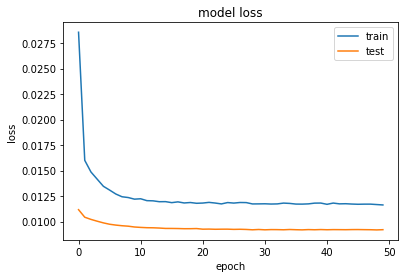

In [44]:
# Network fitting
history = model.fit(train_x, train_y, epochs=50, batch_size=70, validation_data=(test_x, test_y), verbose=2, shuffle=False)

# Loss history plot
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

size = df_resample.shape[1]

In [45]:
# Prediction test
yhat = model.predict(test_x)
test_x = test_x.reshape((test_x.shape[0], size))

# invert scaling for prediction
inv_yhat = np.concatenate((yhat, test_x[:, 1-size:]), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0]

# invert scaling for actual
test_y = test_y.reshape((len(test_y), 1))
inv_y = np.concatenate((test_y, test_x[:, 1-size:]), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]

# calculate RMSE
rmse = np.sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 0.618


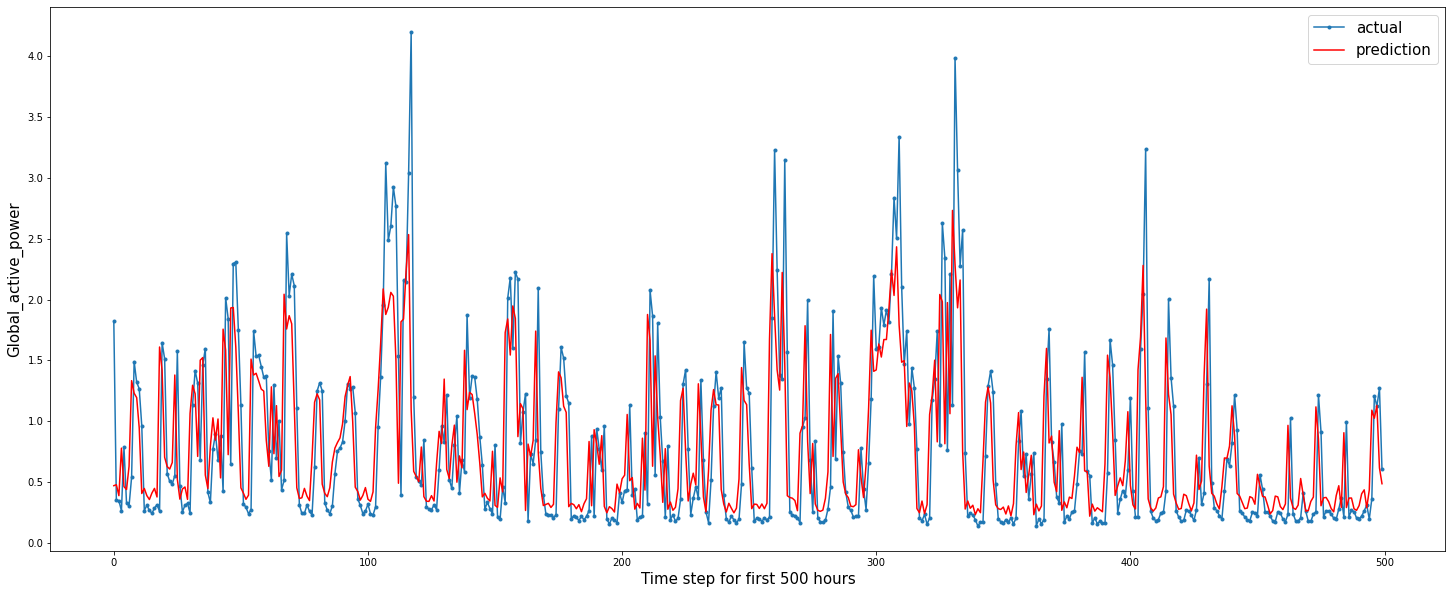

In [46]:
aa=[x for x in range(500)]
plt.figure(figsize=(25,10)) 
plt.plot(aa, inv_y[:500], marker='.', label="actual")
plt.plot(aa, inv_yhat[:500], 'r', label="prediction")
plt.ylabel(df.columns[0], size=15)
plt.xlabel('Time step for first 500 hours', size=15)
plt.legend(fontsize=15)
plt.show()

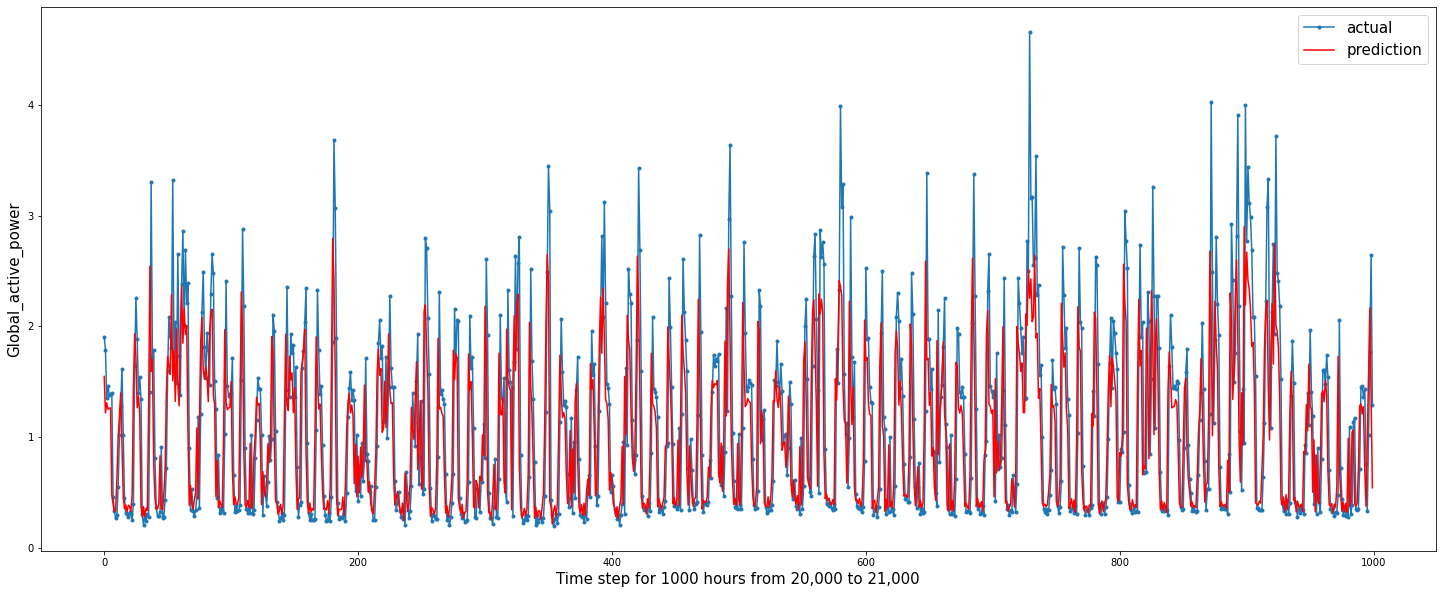

In [47]:
aa=[x for x in range(1000)]
plt.figure(figsize=(25,10)) 
plt.plot(aa, inv_y[20000:21000], marker='.', label="actual")
plt.plot(aa, inv_yhat[20000:21000], 'r', label="prediction")
plt.ylabel(df.columns[0], size=15)
plt.xlabel('Time step for 1000 hours from 20,000 to 21,000', size=15)
plt.legend(fontsize=15)
plt.show()